In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the stock price dataset
file_path = r"C:\Users\prana\Downloads\Aditi\Pranav\Portfolio_Projects\Time Series Analysis\META_stockprice.csv"
stock_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(stock_data.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2023-03-13  177.960007  183.779999  174.820007  180.899994  180.708267   
1  2023-03-14  187.580002  194.320007  186.559998  194.020004  193.814362   
2  2023-03-15  192.949997  197.779999  190.839996  197.750000  197.540405   
3  2023-03-16  198.259995  205.759995  196.089996  204.929993  204.712784   
4  2023-03-17  200.559998  201.899994  195.429993  195.610001  195.402679   

     Volume  
0  24728000  
1  41642600  
2  42123600  
3  50447100  
4  50141100  


In [11]:
# Correlation Analysis
correlation_data = stock_data.drop('Date', axis=1)
correlation_matrix = correlation_data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999026  0.998950  0.997728   0.997732 -0.182247
High       0.999026  1.000000  0.999096  0.999149   0.999150 -0.172745
Low        0.998950  0.999096  1.000000  0.999105   0.999106 -0.197421
Close      0.997728  0.999149  0.999105  1.000000   0.999999 -0.184142
Adj Close  0.997732  0.999150  0.999106  0.999999   1.000000 -0.184198
Volume    -0.182247 -0.172745 -0.197421 -0.184142  -0.184198  1.000000


In [12]:
# Forecasting of Stock Prices using ARIMA model
# Prepare data
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)
stock_data.sort_index(inplace=True)

In [13]:
# Splitting data into train and test sets
train_data = stock_data['Close'].iloc[:-30]
test_data = stock_data['Close'].iloc[-30:]

In [14]:
# Fit ARIMA model
model = sm.tsa.ARIMA(train_data, order=(5,1,0))
fitted_model = model.fit()

C:\Users\prana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\prana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\prana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [16]:
# Forecast
forecast = fitted_model.forecast(steps=30)

C:\Users\prana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


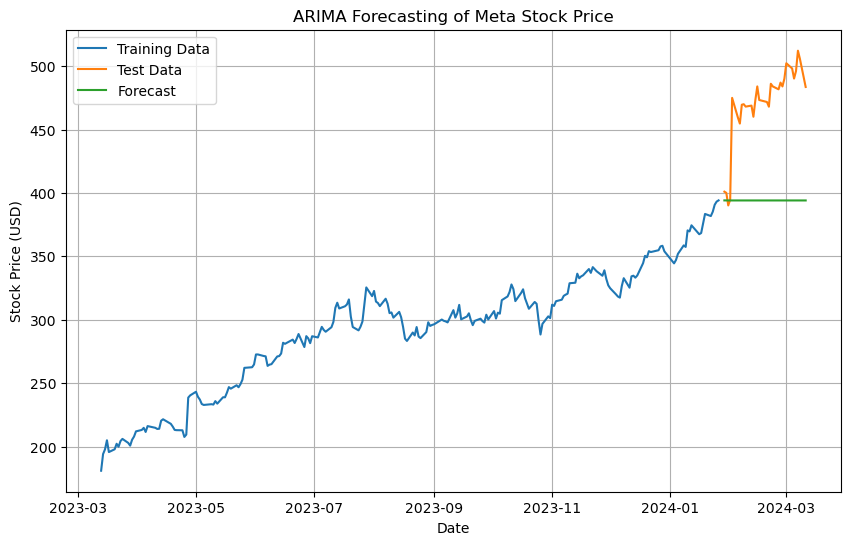

In [17]:
# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title('ARIMA Forecasting of Meta Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Support and Resistance Analysis
# Calculate rolling mean and standard deviation
window_size = 20
stock_data['Rolling Mean'] = stock_data['Close'].rolling(window=window_size).mean()
stock_data['Rolling Std'] = stock_data['Close'].rolling(window=window_size).std()

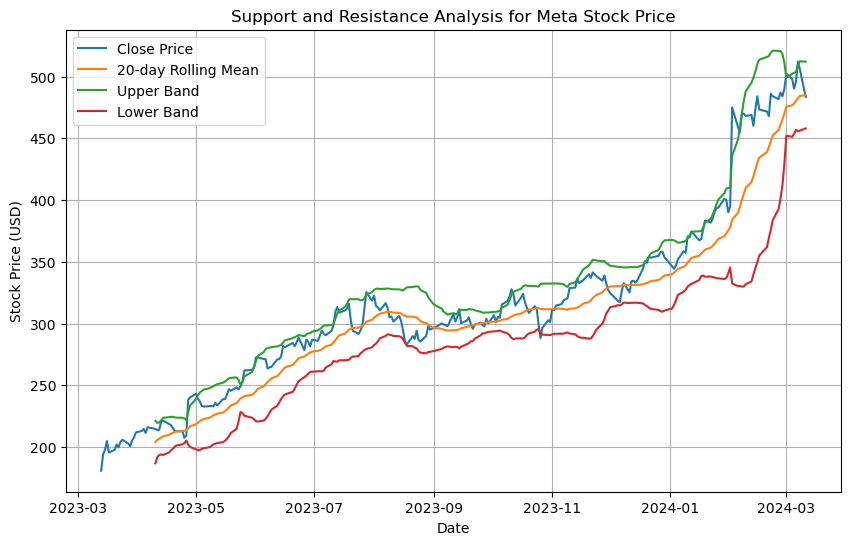

In [19]:
# Plotting the stock price and rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
plt.plot(stock_data.index, stock_data['Rolling Mean'], label=f'{window_size}-day Rolling Mean')
plt.plot(stock_data.index, stock_data['Rolling Mean'] + 2 * stock_data['Rolling Std'], label='Upper Band')
plt.plot(stock_data.index, stock_data['Rolling Mean'] - 2 * stock_data['Rolling Std'], label='Lower Band')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title('Support and Resistance Analysis for Meta Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Seasonal Patterns Analysis
# Extract month from date
stock_data['Month'] = stock_data.index.month

# Calculate average stock price for each month
monthly_avg_price = stock_data.groupby('Month')['Close'].mean()

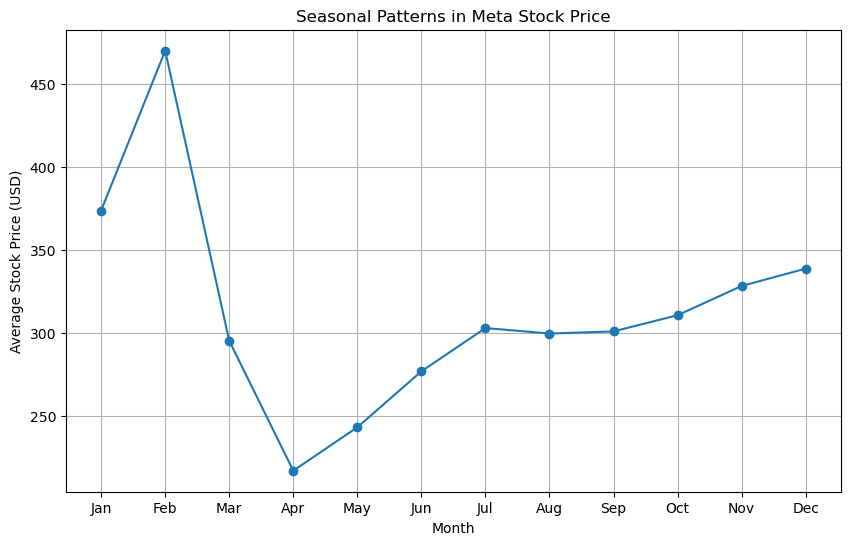

In [21]:
# Plotting the average stock price for each month
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_price.index, monthly_avg_price.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Stock Price (USD)')
plt.title('Seasonal Patterns in Meta Stock Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()